# Covid 19 X-ray chest classifier - Xception net based

3 classes
<ol>
<li>Norma</li>
<li>Covid19</li>
<li>Other Virus </li>
</ol>





In [ ]:




!ls -l
!rm -R sample_data/



total 4
drwxr-xr-x 1 root root 4096 Aug 15 13:44 sample_data


In [ ]:
!gdown https://drive.google.com/uc?id=1fDsWDegI_OmxmPzoJtGhGDlzbD7HkUBY

Downloading...
From: https://drive.google.com/uc?id=1fDsWDegI_OmxmPzoJtGhGDlzbD7HkUBY
To: /content/covid19.zip
100% 1.33G/1.33G [00:14<00:00, 89.0MB/s]


In [ ]:
!ls -l
!unzip ./covid19.zip


total 1297820
-rw-r--r-- 1 root root 1328962554 Aug 21 18:59 covid19.zip
Archive:  ./covid19.zip
   creating: train/
   creating: train/COVID/
  inflating: train/COVID/1-s2.0-S1931312820301852-gr1_lrg-b.png  
  inflating: train/COVID/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: train/COVID/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: train/COVID/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: train/COVID/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: train/COVID/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: train/COVID/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: train/COVID/1-s2.0-S1684118220300372-gr1_lrg-b.png  
  inflating: train/COVID/1-s2.0-S1684118220300372-gr1_lrg-a.png  
  inflating: train/COVID/1-s2.0-S1521661620303314-gr1_lrg-b.png  
  inflating: train/COVID/1-s2.0-S1521661620303314-gr1_lrg-a.png  
  inflating: train/COVID/1-s2.0-S1341321X20301124-gr3_lrg-e.png  
  inflating: train/COVID/1-s2.0-S13

In [ ]:

import tensorflow
from PIL import Image
import glob

from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
#from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
for dirname, _, filenames in os.walk('./train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./train/COVID/000003.jpg
./train/COVID/000001-11.jpg
./train/COVID/78b60346d1b3bce85353b6dc462d75_jumbo.jpeg
./train/COVID/covid-19-infection-exclusive-gastrointestinal-symptoms-l.png
./train/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png
./train/COVID/ciaa199.pdf-001-c.png
./train/COVID/acute-respiratory-distress-syndrome-ards-1.jpg
./train/COVID/b39f5cf9.jpg
./train/COVID/16669_3_1.jpeg
./train/COVID/16689_1_5.png
./train/COVID/kjr-21-e24-g001-l-b.jpg
./train/COVID/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
./train/COVID/F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg
./train/COVID/jkms-35-e79-g001-l-a.jpg
./train/COVID/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg
./train/COVID/000003-5.jpg
./train/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png
./train/COVID/000001-16.jpg
./train/COVID/c828e894.jpg
./train/COVID/a8ef731d274b273f1526d8d0ffbe3b_jumbo.jpeg
./train/COVID/F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg
./train/COVID/1-s2.0-S1931312820301852-gr1_lrg

In [ ]:


COV_DIR = "./train/COVID/"
NORM_DIR = "./train/NORMAL/"
VIR_DIR = "./train/PNEUMONIA/"
Pimages = os.listdir(COV_DIR)
Nimages = os.listdir(NORM_DIR)
Vimages = os.listdir(VIR_DIR)

In [ ]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [ ]:
Images_details(COV_DIR)
Images_details(NORM_DIR)
Images_details(VIR_DIR)


 ====== Images in:  ./train/COVID/
images_count:	755
min_width:	157
max_width:	4757
min_height:	156
max_height:	4757
 ====== Images in:  ./train/NORMAL/
images_count:	1583
min_width:	912
max_width:	2713
min_height:	496
max_height:	2713
 ====== Images in:  ./train/PNEUMONIA/
images_count:	672
min_width:	502
max_width:	1944
min_height:	307
max_height:	1944


In [ ]:
data=[]
labels=[]
Uninfected=os.listdir(NORM_DIR)
for a in Uninfected:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(NORM_DIR+a)
	print(NORM_DIR+a)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

Covid=os.listdir(COV_DIR)
for b in Covid:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(COV_DIR+b)
	print(COV_DIR+b)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)

Virus=os.listdir(VIR_DIR)
for c in Virus:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(VIR_DIR+c)
	print(VIR_DIR+c)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(2)

./train/NORMAL/IM-0041-0001.jpeg
./train/NORMAL/IM-0615-0001.jpeg
./train/NORMAL/IM-0269-0001.jpeg
./train/NORMAL/IM-0351-0001.jpeg
./train/NORMAL/IM-0434-0001.jpeg
./train/NORMAL/IM-0127-0001.jpeg
./train/NORMAL/NORMAL2-IM-1427-0001.jpeg
./train/NORMAL/NORMAL2-IM-0271-0001.jpeg
./train/NORMAL/IM-0388-0001.jpeg
./train/NORMAL/IM-0523-0001-0002.jpeg
./train/NORMAL/IM-0377-0001.jpeg
./train/NORMAL/NORMAL2-IM-0059-0001.jpeg
./train/NORMAL/NORMAL2-IM-0488-0001.jpeg
./train/NORMAL/NORMAL2-IM-0515-0001.jpeg
./train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg
./train/NORMAL/IM-0484-0001.jpeg
./train/NORMAL/IM-0306-0001.jpeg
./train/NORMAL/NORMAL2-IM-0554-0001.jpeg
./train/NORMAL/NORMAL2-IM-0496-0001.jpeg
./train/NORMAL/NORMAL2-IM-1360-0001.jpeg
./train/NORMAL/NORMAL2-IM-0744-0001.jpeg
./train/NORMAL/IM-0458-0001.jpeg
./train/NORMAL/IM-0505-0001.jpeg
./train/NORMAL/NORMAL2-IM-0781-0001.jpeg
./train/NORMAL/IM-0033-0001.jpeg
./train/NORMAL/NORMAL2-IM-0689-0001.jpeg
./train/NORMAL/NORMAL2-IM-1148-0001.

In [ ]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255.0
labels = np.array(labels)



In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels,
	test_size=0.20,  random_state=42)

In [ ]:
trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [ ]:
inputs = Input(shape=(224, 224, 3))
# First conv block
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# second conv block
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# third conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# first separable conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# second separable conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# third separable conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# fourth separable conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# fifth separable conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# sixth separable conv block
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=3, activation='softmax')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
INIT_LR = 1e-3
EPOCHS = 100
BS = 8


# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]
model.summary()

[INFO] compiling model...
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 separable_conv2d_24 (Separa  (None, 112, 112, 32)     688       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_25 (Separa  (No

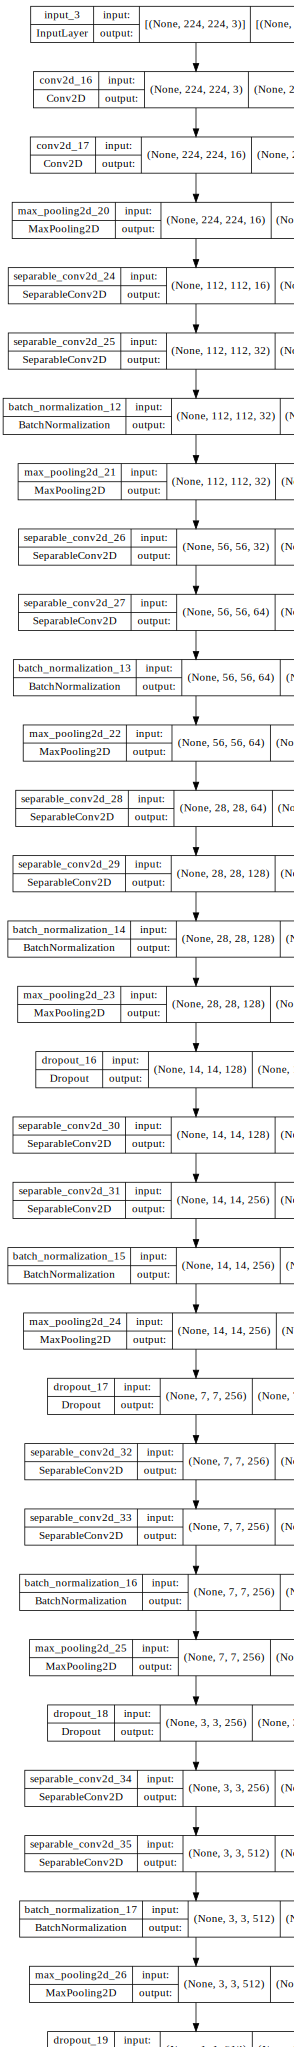

In [ ]:
from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot
modelSVG=SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))
display(modelSVG)

In [ ]:

print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=callbacks)


[INFO] training head...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
301/301 [==============================] - ETA: 0s - loss: 0.9087 - accuracy: 0.6042

301/301 [==============================] - 49s 110ms/step - loss: 0.9087 - accuracy: 0.6042 - val_loss: 1.0283 - val_accuracy: 0.5266
Epoch 2/100
301/301 [==============================] - ETA: 0s - loss: 0.7160 - accuracy: 0.7031

301/301 [==============================] - 30s 99ms/step - loss: 0.7160 - accuracy: 0.7031
Epoch 3/100
301/301 [==============================] - ETA: 0s - loss: 0.5538 - accuracy: 0.8081

301/301 [==============================] - 31s 104ms/step - loss: 0.5538 - accuracy: 0.8081
Epoch 4/100
301/301 [==============================] - ETA: 0s - loss: 0.5196 - accuracy: 0.8355

301/301 [==============================] - 30s 99ms/step - loss: 0.5196 - accuracy: 0.8355
Epoch 5/100
301/301 [==============================] - ETA: 0s - loss: 0.4368 - accuracy: 0.8576

301/301 [==============================] - 32s 105ms/step - loss: 0.4368 - accuracy: 0.8576
Epoch 6/100
301/301 [==============================] - ETA: 0s - loss: 0.4068 - accuracy: 0.8754

301/301 [==============================] - 30s 99ms/step - loss: 0.4068 - accuracy: 0.8754
Epoch 7/100
301/301 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.8962

301/301 [==============================] - 30s 99ms/step - loss: 0.3817 - accuracy: 0.8962
Epoch 8/100
301/301 [==============================] - ETA: 0s - loss: 0.3368 - accuracy: 0.8999

301/301 [==============================] - 30s 99ms/step - loss: 0.3368 - accuracy: 0.8999
Epoch 9/100
301/301 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.9037

301/301 [==============================] - 30s 99ms/step - loss: 0.3423 - accuracy: 0.9037
Epoch 10/100
301/301 [==============================] - ETA: 0s - loss: 0.3049 - accuracy: 0.9124

301/301 [==============================] - 31s 102ms/step - loss: 0.3049 - accuracy: 0.9124
Epoch 11/100
301/301 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.9215

301/301 [==============================] - 32s 105ms/step - loss: 0.2793 - accuracy: 0.9215
Epoch 12/100
301/301 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.9103

301/301 [==============================] - 30s 99ms/step - loss: 0.2769 - accuracy: 0.9103
Epoch 13/100
301/301 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.9215

301/301 [==============================] - 30s 101ms/step - loss: 0.2557 - accuracy: 0.9215
Epoch 14/100
301/301 [==============================] - ETA: 0s - loss: 0.2593 - accuracy: 0.9248

301/301 [==============================] - 31s 101ms/step - loss: 0.2593 - accuracy: 0.9248
Epoch 15/100
301/301 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9269

301/301 [==============================] - 30s 100ms/step - loss: 0.2572 - accuracy: 0.9269
Epoch 16/100
301/301 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.9323

301/301 [==============================] - 30s 100ms/step - loss: 0.2420 - accuracy: 0.9323
Epoch 17/100
301/301 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9390

301/301 [==============================] - 32s 107ms/step - loss: 0.2436 - accuracy: 0.9390
Epoch 18/100
301/301 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.9302

301/301 [==============================] - 30s 100ms/step - loss: 0.2499 - accuracy: 0.9302
Epoch 19/100
301/301 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9381

301/301 [==============================] - 30s 99ms/step - loss: 0.2025 - accuracy: 0.9381
Epoch 20/100
301/301 [==============================] - ETA: 0s - loss: 0.2370 - accuracy: 0.9377

301/301 [==============================] - 30s 99ms/step - loss: 0.2370 - accuracy: 0.9377
Epoch 21/100
301/301 [==============================] - ETA: 0s - loss: 0.1825 - accuracy: 0.9435

301/301 [==============================] - 30s 98ms/step - loss: 0.1825 - accuracy: 0.9435
Epoch 22/100
301/301 [==============================] - ETA: 0s - loss: 0.1435 - accuracy: 0.9576

301/301 [==============================] - 30s 99ms/step - loss: 0.1435 - accuracy: 0.9576
Epoch 23/100
301/301 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9435

301/301 [==============================] - 32s 106ms/step - loss: 0.2120 - accuracy: 0.9435
Epoch 24/100
291/301 [============================>.] - ETA: 0s - loss: 0.2616 - accuracy: 0.9278

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
model = load_model('.mdl_wts.hdf5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

OSError: ignored

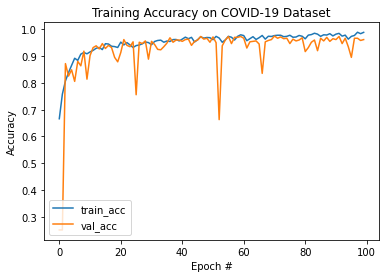

In [ ]:
N = EPOCHS

plt.figure()

plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

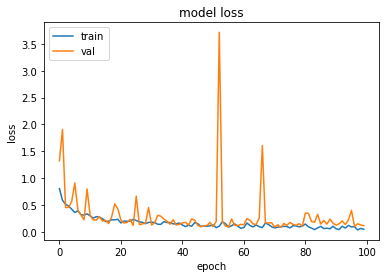

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['normal','covid','virus']))

             precision    recall  f1-score   support

     normal       0.98      0.98      0.98       317
      covid       0.98      0.99      0.98       151
      virus       0.94      0.94      0.94       134

avg / total       0.97      0.97      0.97       602



In [ ]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)
pred_Y

602/602 [==============================] - 2s 3ms/step


array([[1.0000000e+00, 0.0000000e+00, 3.7782548e-14],
       [1.0000000e+00, 0.0000000e+00, 2.4073281e-22],
       [9.9999774e-01, 4.4086875e-27, 2.2355550e-06],
       ...,
       [1.3615922e-15, 1.0000000e+00, 1.6605799e-13],
       [1.0000000e+00, 5.9590121e-37, 1.3652222e-08],
       [4.0780287e-03, 6.7964640e-07, 9.9592125e-01]], dtype=float32)

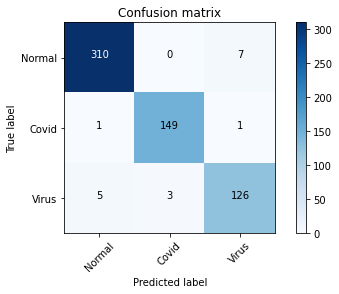

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Normal','Covid','Virus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX, batch_size=8)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis = 1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

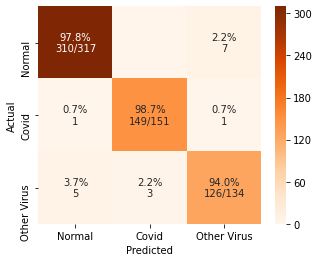

In [ ]:
import seaborn as sns
import pandas as pd

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="Oranges") #"YlGnBu"
    plt.savefig("CovidInception.pdf")
    plt.show()



cm_analysis(testY,np.argmax(pred_Y,axis=1), labels=["Normal","Covid","Other Virus"], ymap=None, figsize=(5,4))
